# EDA basico: WHO COVID-19 global daily data

Archivo: `data/raw/WHO-COVID-19-global-daily-data.csv`

Este cuaderno hace un EDA basico: carga de datos, resumen general, valores faltantes, distribuciones y tendencias.


### Setup & Libraries / Configuracion y librerias


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
plt.style.use('seaborn-v0_8-whitegrid')


Loads core libraries and sets display/plot style. / Carga librerias base y configura opciones de visualizacion y estilo.


### Data Loading / Carga de datos


In [3]:
from pathlib import Path

DATA_PATH = Path('..') / 'data' / 'raw' / 'WHO-COVID-19-global-daily-data.csv'

if not DATA_PATH.exists():
    raise FileNotFoundError(f"No se encontro el archivo: {DATA_PATH}")

# Cargar datos
# parse_dates intenta convertir columnas de fecha si existen
try:
    df = pd.read_csv(DATA_PATH, parse_dates=['Date_reported'])
except Exception:
    df = pd.read_csv(DATA_PATH)

print(df.shape)
print(df.head())


(529680, 8)
  Date_reported Country_code         Country WHO_region  New_cases  \
0    2020-01-04           AF     Afghanistan        EMR        NaN   
1    2020-01-04           DZ         Algeria        AFR        NaN   
2    2020-01-04           AL         Albania        EUR        NaN   
3    2020-01-04           AI        Anguilla        AMR        NaN   
4    2020-01-04           AS  American Samoa        WPR        0.0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         NaN                  0  
3                 0         NaN                  0  
4                 0         0.0                  0  


Defines the file path, validates existence, loads the CSV, and prints a quick preview. / Define la ruta, valida existencia, carga el CSV y muestra un vistazo.


### Data Types & Missing Values / Tipos de datos y faltantes


In [4]:
# Tipos de datos y nulos
summary = pd.DataFrame({
    'dtype': df.dtypes,
    'n_missing': df.isna().sum(),
    'pct_missing': (df.isna().mean() * 100).round(2)
})
summary.sort_values('pct_missing', ascending=False)


,dtype,n_missing,pct_missing
New_deaths,float64,374649,70.73
New_cases,float64,316980,59.84
Country_code,object,2207,0.42
Date_reported,datetime64[ns],0,0.00
Country,object,0,0.00
WHO_region,object,0,0.00
Cumulative_cases,int64,0,0.00
Cumulative_deaths,int64,0,0.00


Summarizes dtypes and missing values per column. / Resume tipos y faltantes por columna.


### Duplicate Check / Revision de duplicados


In [5]:
# Duplicados
print('Duplicados totales:', df.duplicated().sum())


Duplicados totales: 0


Counts duplicated rows in the dataset. / Cuenta filas duplicadas en el dataset.


### Numeric Summary / Resumen numerico


In [6]:
# Estadisticos basicos de columnas numericas
num_cols = df.select_dtypes(include='number').columns
if len(num_cols) > 0:
    display(df[num_cols].describe().T)
else:
    print('No se encontraron columnas numericas.')


,count,mean,std,min,25%,50%,75%,max
New_cases,212700.0,3.662851e+03,4.829569e+04,-65079.0,3.0,59.0,664.0,6966046.0
Cumulative_cases,529680.0,2.135996e+06,8.769194e+06,0.0,7375.0,63886.0,672812.0,103436829.0
New_deaths,155031.0,4.585965e+01,2.415852e+02,-3520.0,0.0,2.0,14.0,44047.0
Cumulative_deaths,529680.0,2.227922e+04,8.858470e+04,0.0,45.0,743.0,8519.0,1233841.0


Selects numeric columns and shows descriptive statistics. / Selecciona columnas numericas y muestra estadisticos.


### Categorical Counts / Conteos categoricos


In [7]:
# Valores unicos en columnas categoricas (top 10)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}")
    display(df[col].value_counts(dropna=False).head(10))


Country_code


Country_code
AF    2207
DZ    2207
NC    2207
KR    2207
NO    2207
LT    2207
MK    2207
RE    2207
PS    2207
LU    2207
Name: count, dtype: int64

Country


Country
Afghanistan                                                 2207
Algeria                                                     2207
New Caledonia                                               2207
Republic of Korea                                           2207
Norway                                                      2207
Lithuania                                                   2207
North Macedonia                                             2207
R�union                                                     2207
occupied Palestinian territory, including east Jerusalem    2207
Luxembourg                                                  2207
Name: count, dtype: int64

WHO_region


WHO_region
EUR      136834
AMR      119178
AFR      110350
WPR       79452
EMR       48554
SEAR      22070
OTHER     13242
Name: count, dtype: int64

Shows top value counts for categorical columns. / Muestra top de frecuencias en columnas categoricas.


### Histograms / Histogramas


In [8]:
# Top 10 paises por acumulado (si existe Country)
if 'Country' in df.columns and len(num_cols) > 0:
    country_sum = df.groupby('Country')[num_cols].sum(min_count=1).sort_values(by=num_cols[0], ascending=False)
    display(country_sum.head(10))


,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,
United States of America,103436829.0,161209760957,1233841.0,1954406691
China,99381761.0,112955898838,122398.0,144794455
India,45056126.0,76177015608,533847.0,922156795
France,39057095.0,56045068303,168194.0,286979363
Germany,38437943.0,53832563548,174979.0,283480645
Brazil,37949801.0,60432268103,703685.0,1221293210
Republic of Korea,34571873.0,44164772610,35934.0,48607453
Japan,33803572.0,42653915505,74694.0,100331733
Italy,26969719.0,37931052129,198523.0,332653391


Plots distributions for numeric columns. / Grafica distribuciones de columnas numericas.


### Boxplots / Diagramas de caja


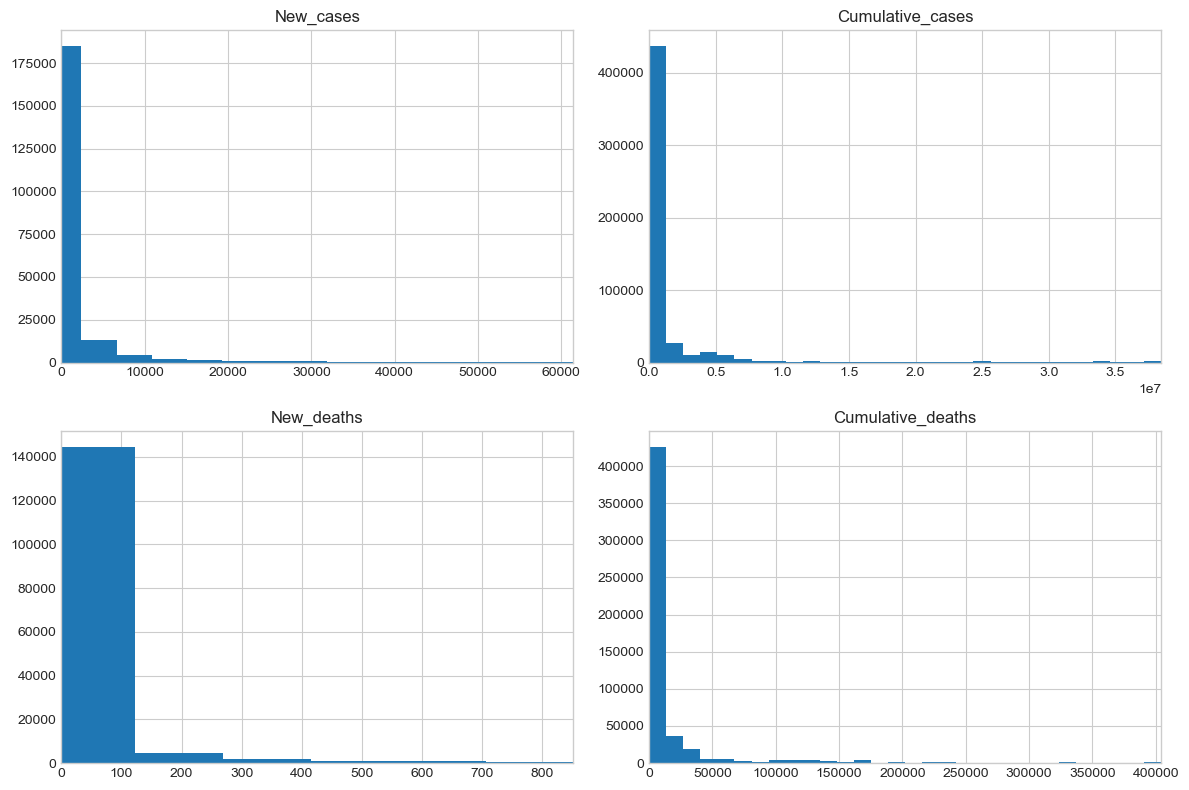

In [9]:
# Distribuciones de columnas numericas (histogramas)
# Histogramas con corte en p99 (mejor visualización)
if len(num_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    for ax, col in zip(axes, num_cols[:4]):
        x = df[col].dropna()
        if x.empty:
            ax.axis('off')
            continue
        upper = x.quantile(0.99)
        ax.hist(x[x <= upper], bins=30)
        ax.set_title(col)
        ax.set_xlim(0, upper)
    plt.tight_layout()



Boxplots for numeric columns to inspect spread/outliers. / Boxplots para inspeccionar dispersion y outliers.


### Time Series / Series temporales


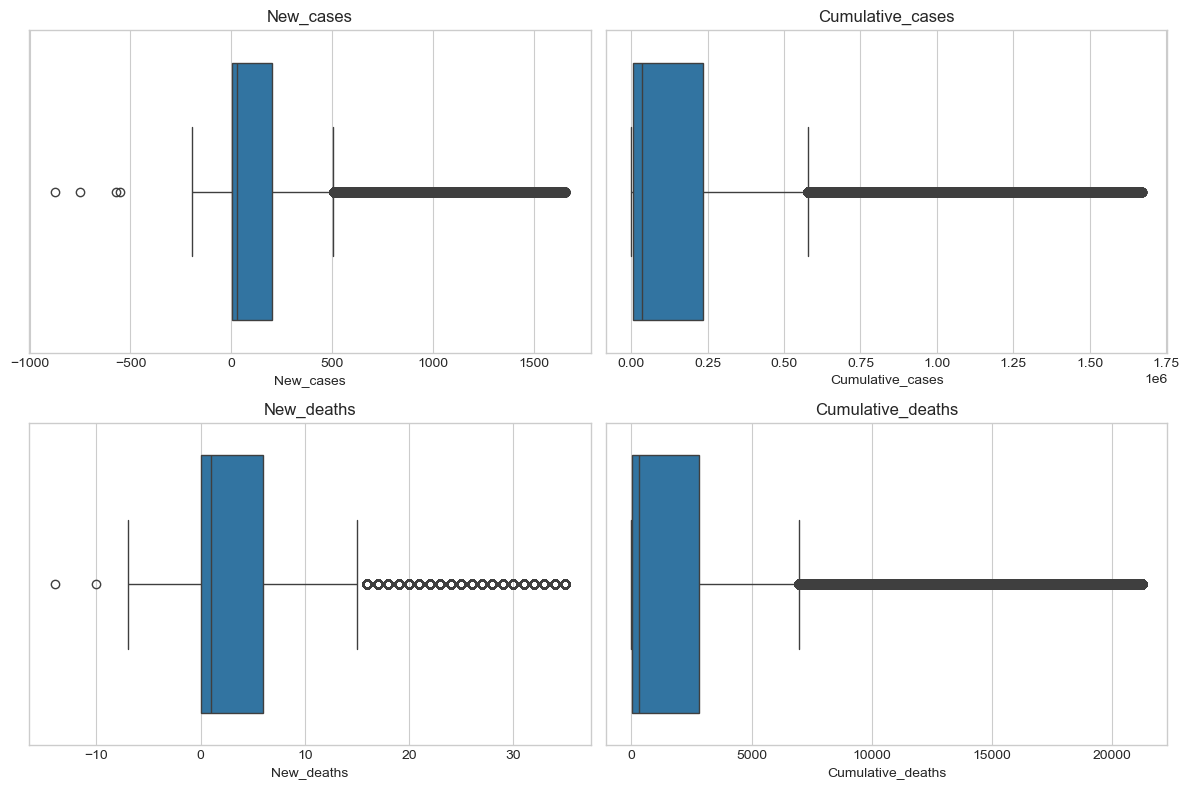

In [10]:
# Boxplots separados, autoescalados y sin outliers (IQR)
if len(num_cols) > 0:
    cols = list(num_cols[:4])  # cambia si quieres otras columnas

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        x = df[col].dropna()
        if x.empty:
            ax.axis('off')
            continue

        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lo = q1 - 1.5 * iqr
        hi = q3 + 1.5 * iqr

        x_filtrado = x[(x >= lo) & (x <= hi)]

        sns.boxplot(x=x_filtrado, ax=ax)
        ax.set_title(col)

    for ax in axes[len(cols):]:
        ax.axis('off')

    plt.tight_layout()


Aggregates by date and plots daily sums. / Agrega por fecha y grafica sumas diarias.


### Top Countries / Paises principales


In [11]:
# Analisis temporal interactivo por pais (robusto a mayusculas)
import ipywidgets as widgets
from IPython.display import display, clear_output

if 'Date_reported' in df.columns and 'Country' in df.columns:
    # Normalizar nombres de columnas
    col_map = {c.lower(): c for c in df.columns}

    # Resolver columnas reales
    cc = col_map.get('cumulative_cases')
    nc = col_map.get('new_cases')
    cd = col_map.get('cumulative_deaths')
    nd = col_map.get('new_deaths')

    if not all([cc, nc, cd, nd]):
        print("No se encontraron todas las columnas esperadas.")
        print("Columnas disponibles:", list(df.columns))
    else:
        if not np.issubdtype(df['Date_reported'].dtype, np.datetime64):
            df['Date_reported'] = pd.to_datetime(df['Date_reported'], errors='coerce')

        countries = sorted(df['Country'].dropna().unique())
        country1 = widgets.Dropdown(options=countries, description='Pais 1')
        country2 = widgets.Dropdown(options=countries, description='Pais 2')

        if len(countries) >= 2:
            country1.value = countries[0]
            country2.value = countries[1]

        out = widgets.Output()

        def plot_countries(change=None):
            with out:
                clear_output(wait=True)
                c1 = country1.value
                c2 = country2.value

                df_c1 = df[df['Country'] == c1].groupby('Date_reported')[[cc, nc, cd, nd]].sum(min_count=1)
                df_c2 = df[df['Country'] == c2].groupby('Date_reported')[[cc, nc, cd, nd]].sum(min_count=1)

                # Casos
                # Casos: doble eje (cumulative vs new)
                fig, ax1 = plt.subplots(figsize=(12, 5))

                # acumulados en eje izquierdo
                ax1.plot(df_c1.index, df_c1[cc], label=f'{c1} {cc}', color='C0')
                ax1.plot(df_c2.index, df_c2[cc], label=f'{c2} {cc}', color='C1')
                ax1.set_ylabel('Cumulative')

                # nuevos en eje derecho
                ax2 = ax1.twinx()
                ax2.plot(df_c1.index, df_c1[nc], label=f'{c1} {nc}', color='C0', linestyle='--')
                ax2.plot(df_c2.index, df_c2[nc], label=f'{c2} {nc}', color='C1', linestyle='--')
                ax2.set_ylabel('New')

                # leyenda combinada
                lines = ax1.get_lines() + ax2.get_lines()
                labels = [l.get_label() for l in lines]
                ax1.legend(lines, labels, loc='upper left')

                plt.title('Casos: cumulative vs new (doble eje)')
                plt.tight_layout()
                plt.show()


                # Muertes
                # Muertes: doble eje (cumulative vs new)
                fig, ax1 = plt.subplots(figsize=(12, 5))

                ax1.plot(df_c1.index, df_c1[cd], label=f'{c1} {cd}', color='C2')
                ax1.plot(df_c2.index, df_c2[cd], label=f'{c2} {cd}', color='C3')
                ax1.set_ylabel('Cumulative')

                ax2 = ax1.twinx()
                ax2.plot(df_c1.index, df_c1[nd], label=f'{c1} {nd}', color='C2', linestyle='--')
                ax2.plot(df_c2.index, df_c2[nd], label=f'{c2} {nd}', color='C3', linestyle='--')
                ax2.set_ylabel('New')

                lines = ax1.get_lines() + ax2.get_lines()
                labels = [l.get_label() for l in lines]
                ax1.legend(lines, labels, loc='upper left')

                plt.title('Muertes: cumulative vs new (doble eje)')
                plt.tight_layout()
                plt.show()


        country1.observe(plot_countries, names='value')
        country2.observe(plot_countries, names='value')

        display(widgets.HBox([country1, country2]))
        display(out)
        plot_countries()
else:
    print('No se encontro Date_reported o Country.')


Output()

Shows top 10 countries by summed metrics. / Muestra top 10 paises por metricas sumadas.


## Notas

- 
- 